# TEXT AND DOCUMENT SUMMARIZER APP

### All Imports

In [2]:
import re 
import nltk  
import heapq 
import string 
import numpy as np
import networkx as nx 
from goose3 import Goose 
from nltk.cluster.util import cosine_distance
import PyPDF2
from PIL import Image
import pytesseract
from wordcloud import WordCloud  
import matplotlib.pyplot as plt


In [4]:
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
stopwords = nltk.corpus.stopwords.words('english') 

In [ ]:
original_text2 = """
I intend to be a researcher in the academic field. 
In my line of work/career, we spend seventy percent of the time reading and 
reviewing published articles. This task can be overwhelming as we are 
required to read several pages, comprising of several hundreds of articles 
before formulating our idea and articles. 
I remember this was the most difficult part of my masters and phd programs. 
This story is true for almost every researcher, as there is no way around it. 
The sad part is sometimes, after reading these articles, you realize they are 
unrelated to your project or not what you are looking for. This can be 
heart-breaking and time consuming. 

This story is not only related to only researchers, but it is also true for 
people who read several texts. Reading blobs and information from the website 
can also be these difficult sometimes. 
To ease the pain, I intend to build a text summarizer where the reader 
will be to read the summary of a whole text. This will enable the user to at 
least filter out the relevant articles related to his/her topic. 

"""

### Extract Text from Image

In [7]:
def text_from_image(path_to_image):
    image = Image.open(path_to_image)
    text = pytesseract.image_to_string(image, lang='eng', config=r"--psm 11 --oem 3")
    text = text.replace('\n', ' ').replace(' .', '.').replace(" '", "'").replace(' ?', '?').replace('|', 'I').replace('  ', ' ')
    return text 

print(text_from_image("data/image.png"))

Heterogeneous Ziegler—Natta (ZN) catalysis is currently the main technique for industrial production of polyolefins.’* The current state-of-the-art ZN catalysts are composed of MgCl, TiC, and a Lewis base (internal donor).° Contacting the ternary mixture with a trialkyl aluminum cocatalyst and another and Lewis base (external donor) yields the catalytically active species with reduced oxidation states of Ti.”* Each of these components play a significant role in the polymerization process, though their precise functions are not fully understood and the structure of the catalyst is ill-defined because of a high 1-3 complexity of the overall system. The catalytic reactions take place on the surfaces of the MgCl, support.°*® The bulk MgCl, is a crystalline layered material, which exists in three polymorphs: rhombohedral a- MgCl, hexagonally closed-packed -MgCl,, and rotationally distorted 6-MgCl,. The layers are held together by dispersion and are composed of octahedral six-coordinated Mg 

### Read PDF Files

In [8]:
def text_from_pdf(path):
    file = open(path, 'rb')
    pdfdoc = PyPDF2.PdfReader(file)
    number_of_pages = len(pdfdoc.pages)
    full_content = ''
    for i in range(number_of_pages):
        page_content = pdfdoc.pages[i].extract_text()
        full_content = full_content + page_content + ' '
    return full_content 

print(text_from_pdf("data/project.pdf"))

CAPSTONE PROJECT  
I intend to build a DL model that use s gestures (such as eye and hand movements) as an input  
device  for computers , television , and other electronic devices . The model, using the eye or  the hand 
movement without an external keyboard, will complete words and sentences for the user. The 
model could be used by anyone, and its application can help physically challenged people to control 
their devices.  
FEA TURES OF THE MODEL  
The mo del should be able to perform the following task:  
✓ Shut down  when it recognized  no one is watching the screen  for some  time (especially for TV s) 
✓ Shut down when the user falls aslee p in front of the screen .  
✓ Able to control the screen with hand or eye gestures.  For TVs, t he eye or hand se rves as a 
remo te control. For PCs , the eye /hand gestures serve  as the mouse/keyboard.  
✓ When using a PC, eye/hand movements should be able to select chara cters , and for which the 
model will be able to pr edict subsequen

### Extract Text from A Website

In [9]:
def text_from_url(url):
    goose = Goose()
    extracted_text = goose.extract(url)
    cleaned_data = extracted_text.cleaned_text 
    return cleaned_data 

print(text_from_url("https://zorvepeter.com/"))

This ML model is built to be able to train and make predictions based on any uploaded .csv or excel file. The user needs not worry about data pre-processing and other requirements prior to the training. 

 Upon uploading the file, the user needs to add the property (target) to be predicted. 

 The training is carried out with the following models

To see how the model works, click here. The source codes are available here on GitHub


### Preprocess Extracted Text

In [11]:
def preprocess(sentence):
    formatted_text = sentence.lower()
    tokens = []
    for token in nltk.word_tokenize(formatted_text):
        tokens.append(token)
    tokens = [word for word in tokens if word not in stopwords and word not in string.punctuation]
    formatted_text = ' '.join(element for element in tokens)
    return formatted_text

data = text_from_url("https://zorvepeter.com/")
print("BEFORE\n", data, "\n\n")

data = preprocess(data)
print("AFTER\n", data)

BEFORE
 This ML model is built to be able to train and make predictions based on any uploaded .csv or excel file. The user needs not worry about data pre-processing and other requirements prior to the training. 

 Upon uploading the file, the user needs to add the property (target) to be predicted. 

 The training is carried out with the following models

To see how the model works, click here. The source codes are available here on GitHub 


AFTER
 ml model built able train make predictions based uploaded .csv excel file user needs worry data pre-processing requirements prior training upon uploading file user needs add property target predicted training carried following models see model works click source codes available github


### Summarize Using Frequency Count 

In [13]:
def summarizer_by_freq(original_text, summary_percentage=0.3):
    original_text       = re.sub(r'\s+', ' ', original_text)
    processed_text      = preprocess(original_text)
    word_frequency      = nltk.FreqDist(nltk.word_tokenize(processed_text))
    highest_frequency   = max(word_frequency.values())
    sentence_list       = nltk.sent_tokenize(original_text)
    percentage          = int(summary_percentage * len(sentence_list))
    for word in word_frequency.keys():
        word_frequency[word] = (word_frequency[word] / highest_frequency)
    score_sentences = {}
    for sentence in sentence_list:
        for word in nltk.word_tokenize(sentence.lower()):
            if sentence not in score_sentences.keys():
                score_sentences[sentence] = word_frequency[word]
            else:
                score_sentences[sentence] += word_frequency[word]
    best_sentences = heapq.nlargest(percentage, score_sentences, key = score_sentences.get)
    summary = ' '.join(best_sentences)
    return summary 


data = text_from_pdf("data/project.pdf")

summary = summarizer_by_freq(data, 0.2)
print(summary)

FEA TURES OF THE MODEL The mo del should be able to perform the following task: ✓ Shut down when it recognized no one is watching the screen for some time (especially for TV s) ✓ Shut down when the user falls aslee p in front of the screen . ✓ When using a PC, eye/hand movements should be able to select chara cters , and for which the model will be able to pr edict subsequent words to be able to complete sentence s faster.


### Summarize Using Luhn 

In [14]:
def calculate_sentences_score(sentences, important_words, distance):
    scores = []
    sentence_index = 0
    for sentence in [nltk.word_tokenize(sentence) for sentence in sentences]:
        word_index = []
        for word in important_words:
            try:
                word_index.append(sentence.index(word))
            except ValueError:
                pass
        word_index.sort()
        if len(word_index) == 0:
            continue
        groups_list = []
        group = [word_index[0]]
        i = 1 # 3
        while i < len(word_index): # 3
            if word_index[i] - word_index[i - 1] < distance:
                group.append(word_index[i])
            else:
                groups_list.append(group[:])
                group = [word_index[i]]
            i += 1
            groups_list.append(group)
        max_group_score = 0
        for g in groups_list:
            important_words_in_group = len(g)
            total_words_in_group = g[-1] - g[0] + 1
            score = 1.0 * important_words_in_group**2 / total_words_in_group
            if score > max_group_score:
                max_group_score = score
        scores.append((max_group_score, sentence_index))
        sentence_index += 1
    return scores

In [15]:
def summarize_by_luhn(original_text, summary_percentage = 0.3):
    original_sentences  = [sentence for sentence in nltk.sent_tokenize(original_text)]
    formatted_sentences = [preprocess(original_sentence) for original_sentence in original_sentences]
    words               = [word for sentence in formatted_sentences for word in nltk.word_tokenize(sentence)]
    frequency           = nltk.FreqDist(words)
    if len(words) > 1500:
        top_n_words = int(len(words) * 0.10)
        distance    = int(len(words) * 0.008)
    else:
        top_n_words = 15
        distance    = 8
    top_n_words         = [word[0] for word in frequency.most_common(top_n_words)]
    sentences_score     = calculate_sentences_score(formatted_sentences, top_n_words, distance)
    sentence_list       = nltk.sent_tokenize(original_text)
    best_sentences = heapq.nlargest(int(len(formatted_sentences) * summary_percentage), sentences_score)
    best_sentences = [original_sentences[i] for (score, i) in best_sentences]
    best_sentences_list = []
    for sentence in sentence_list: 
        for best_sent in best_sentences:
            if best_sent in sentence:
                best_sentences_list.append(sentence)
    summary = ' '.join(best_sentences_list)
    return summary 

data = text_from_pdf("data/project.pdf")
summary = summarizer_by_freq(data, 0.2)
print(summary)

FEA TURES OF THE MODEL The mo del should be able to perform the following task: ✓ Shut down when it recognized no one is watching the screen for some time (especially for TV s) ✓ Shut down when the user falls aslee p in front of the screen . ✓ When using a PC, eye/hand movements should be able to select chara cters , and for which the model will be able to pr edict subsequent words to be able to complete sentence s faster.


### Generate a Word Cloud Image

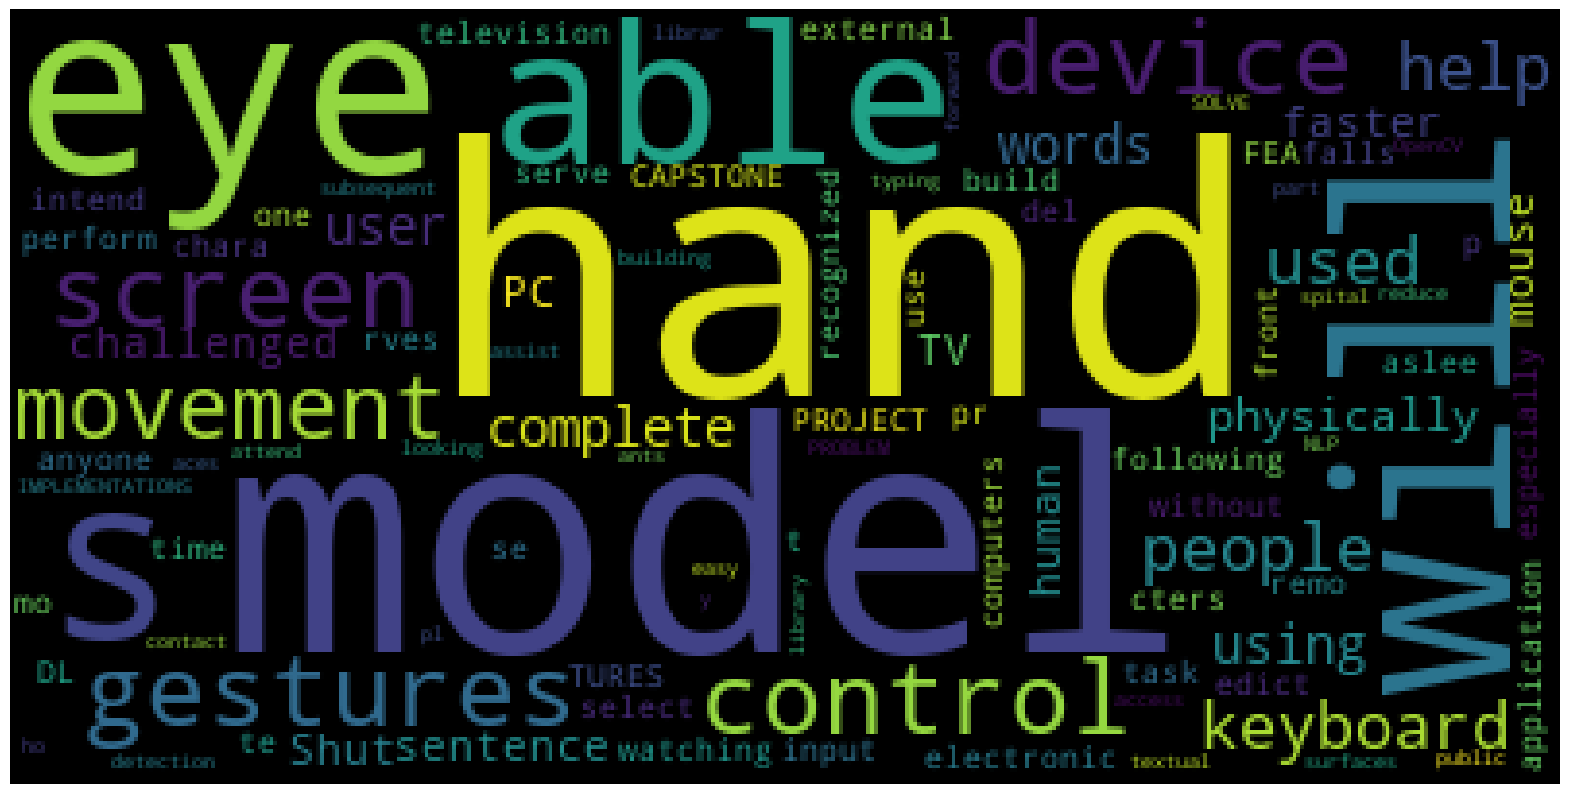

In [19]:
def plot_wordcloud(document):
    plt.figure(figsize=(20, 20))
    plt.axis('off') 
    plt.imshow(WordCloud().generate(document))
    plt.savefig('data/wordcloud.png', bbox_inches='tight',pad_inches = 0)
    return  

plot_wordcloud(data)

### Plot the Saved Image

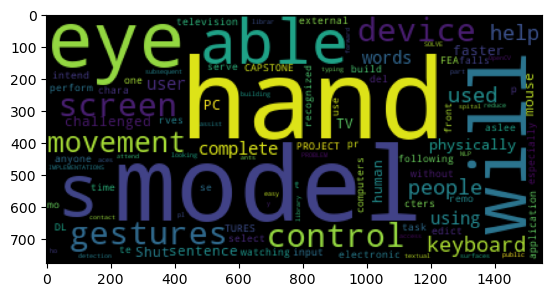

In [20]:
img = np.asarray(Image.open('data/wordcloud.png'))
plt.imshow(img)

### Summary by Frequency Count

In [21]:
def calculate_sentence_similarity(sentence1, sentence2):
    words1    = [word for word in nltk.word_tokenize(sentence1)]
    words2    = [word for word in nltk.word_tokenize(sentence2)]
    all_words = list(set(words1 + words2))
    vector1   = [0] * len(all_words)
    vector2   = [0] * len(all_words)
    for word in words1: 
        vector1[all_words.index(word)] += 1
    for word in words2:
        vector2[all_words.index(word)] += 1
    return 1 - cosine_distance(vector1, vector2)

In [22]:
def calculate_similarity_matrix(sentences):
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            if i == j:
                continue
        similarity_matrix[i][j] = calculate_sentence_similarity(sentences[i], sentences[j])
    return similarity_matrix

In [24]:
def summarize_by_cosine_similarity(original_text, summary_percentage = 0.3):
    # original_text       = re.sub(r"\[\d+\]", ' ', original_text)  #############################################
    original_sentences  = [sentence for sentence in nltk.sent_tokenize(original_text)]
    formatted_sentences = [preprocess(original_sentence) for original_sentence in original_sentences]
    similarity_matrix   = calculate_similarity_matrix(formatted_sentences)
    similarity_graph = nx.from_numpy_array(similarity_matrix)
    scores = nx.pagerank(similarity_graph)
    ordered_scores = sorted(((scores[i], score) for i, score in enumerate(original_sentences)), reverse=True)
    number_of_sentences = int(len(formatted_sentences) * summary_percentage)
    best_sentences = []
    for sentence in range(number_of_sentences):
        best_sentences.append(ordered_scores[sentence][1])
    sentence_list = nltk.sent_tokenize(original_text)
    best_sentences_list = []
    for sentence in sentence_list: 
        for best_sent in best_sentences:
            if best_sent in sentence:
                best_sentences_list.append(sentence)
    summary = ' '.join(best_sentences_list)
    return summary 

print((summarize_by_cosine_similarity(data, 0.2)))


✓ This will also help in easy  and faster typing for people who cannot access their mouse/keyboard  
IMPLEMENTATIONS  
✓ The OpenCV  librar y will be used for the detection of human gestures. ✓ The NLP library will be used for the textual part.
